# ¿Qué es un generador de datos?

Te has encontrado un caso en donde el conjunto de datos es muy grande para ser cargada a memoria RAM ...

Si creamos un generador de datos, podemos leer imágenes durante el proceso de entrenamiento. Dado que estamos leyendo las imágenes sobre la marcha, estamos ahorrando memoria e incluso se puede usar un sistema con 8 GB de RAM para un conjunto de datos de 100 GB (dependiendo del tamaño de las imágenes y de nuestros batches).

Veamos como construir nuestro primer generador de datos.

## Generador estándar de datos en Keras
Keras provee un generador estandar de datos (imágenes) que se encuentra disponible en `tf.keras.preprocessing.image`como la clase `ImageDataGenerator` [[1]](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). El generador estándar permite generar `batchs` de datos y aplicar una técnica de aumento de datos.

Veamos cómo podemos utilizar `ImageDataGenerator` para crear un generador de datos a partir de imágenes almacenadas en un directorio. Para este ejemplo utilizaremos imágenes de hojas que pertenecen a tres variedades de cultivo:

- Apple
- Blueberry
- Grape

Las imágenes a color de dimensiones (256, 256, 3)  y se encuentran en formato JPf. A continuación podemos ver algunos ejemplos de las imágenes:

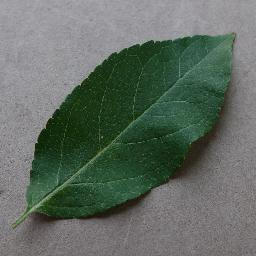

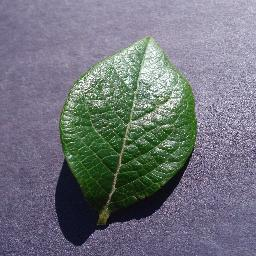

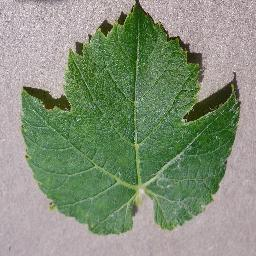

Para verificar que nuestro generador de datos crea los batch de forma apropiada, construyamos un pequeño modelo para clasificar las hojas. Dado que en este momento nuestro interés es el ImageDataGenerator, no pondremos atención en el desempeño del modelo.

# Iniciemos con la actividad ...

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, Conv2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

path='/content/drive/MyDrive/DL2023p-licd/S03/ejemplos/myDataGenerator/data_idg'

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        path,
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

Found 3570 images belonging to 3 classes.
Found 3570 images belonging to 3 classes.


In [ ]:
X, Y =next(train_generator)
print(X.shape, Y.shape)

Xv, Yv =next(validation_generator)
print(Xv.shape, Yv.shape)

(32, 28, 28, 3) (32, 3)
(32, 28, 28, 3) (32, 3)


In [ ]:
model = keras.Sequential([
    InputLayer(input_shape=(28, 28, 3)),
    Conv2D(10, kernel_size=(3,3), strides=1, padding='same', activation="relu"),
    Flatten(),
    Dense(18, activation="relu"),
    Dense(10, activation="relu"),
    Dense(3, activation="softmax")
])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h=model.fit(
        train_generator,
        #steps_per_epoch=2000,
        epochs=15,
        validation_data=validation_generator,
        #validation_steps=800
        )

Epoch 1/15
112/112 [==============================] - 618s 6s/step - loss: 0.6884 - accuracy: 0.7070 - val_loss: 0.3388 - val_accuracy: 0.8835
Epoch 2/15
112/112 [==============================] - 28s 252ms/step - loss: 0.3026 - accuracy: 0.8964 - val_loss: 0.2436 - val_accuracy: 0.9179
Epoch 3/15
112/112 [==============================] - 26s 236ms/step - loss: 0.2403 - accuracy: 0.9168 - val_loss: 0.2140 - val_accuracy: 0.9289
Epoch 4/15
112/112 [==============================] - 27s 245ms/step - loss: 0.2293 - accuracy: 0.9202 - val_loss: 0.1614 - val_accuracy: 0.9476
Epoch 5/15
112/112 [==============================] - 27s 245ms/step - loss: 0.2107 - accuracy: 0.9210 - val_loss: 0.2061 - val_accuracy: 0.9207
Epoch 6/15
112/112 [==============================] - 28s 255ms/step - loss: 0.1927 - accuracy: 0.9303 - val_loss: 0.1470 - val_accuracy: 0.9521
Epoch 7/15
112/112 [==============================] - 27s 244ms/step - loss: 0.1819 - accuracy: 0.9328 - val_loss: 0.1672 - val_accu